<a href="https://colab.research.google.com/github/joeyave/machine-learning-project5/blob/main/machine_learning_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/1.txt

INPUT DATA


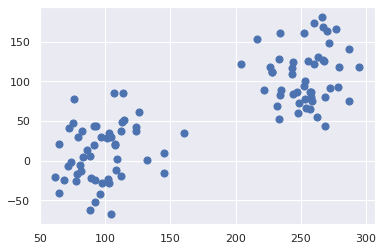


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.83944177, 0.59250594],
       [0.04145065, 0.24415846]])


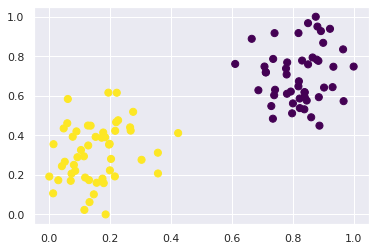

label: 0 - dot: [0.71131207 0.71817381]
label: 0 - dot: [0.79774132 0.51142143]
label: 1 - dot: [0.0508541  0.26650371]
label: 0 - dot: [0.71166941 0.71910563]
label: 0 - dot: [0.83944177 0.59250594]
label: 0 - dot: [0.93081161 0.64390379]
...

ITERATION 2
init centers: 
array([[0.26740154, 0.42399717],
       [0.08082498, 0.25053072]])


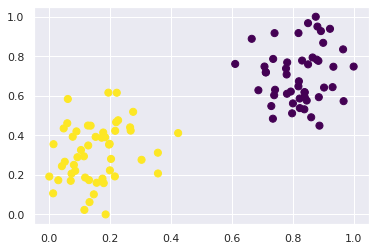

label: 0 - dot: [0.71131207 0.71817381]
label: 0 - dot: [0.79774132 0.51142143]
label: 1 - dot: [0.0508541  0.26650371]
label: 0 - dot: [0.71166941 0.71910563]
label: 0 - dot: [0.83944177 0.59250594]
label: 0 - dot: [0.93081161 0.64390379]
...

ITERATION 3
init centers: 
array([[0.88553394, 0.59314923],
       [0.88421771, 0.77680752]])


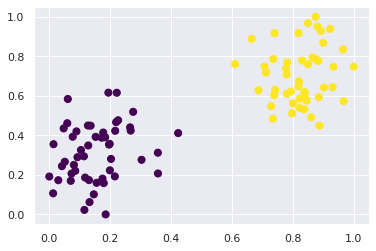

label: 1 - dot: [0.71131207 0.71817381]
label: 1 - dot: [0.79774132 0.51142143]
label: 0 - dot: [0.0508541  0.26650371]
label: 1 - dot: [0.71166941 0.71910563]
label: 1 - dot: [0.83944177 0.59250594]
label: 1 - dot: [0.93081161 0.64390379]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 2.8185383396786508
cluster 1 wcsm: 2.8185383396786508
cluster 2 wcsm: 2.8185383396786508

best cluster index: 0
best cluster wcsm: 2.8185383396786508

CALINSKI HARABASZ INDEX
my metric: 522.6223458960479 - sklearn metric: 522.6223458960479
my metric: 380.0537736682101 - sklearn metric: 380.0537736682101
my metric: 284.3518972932498 - sklearn metric: 284.3518972932498
my metric: 217.95656068572953 - sklearn metric: 217.95656068572953
my metric: 322.5895484801077 - sklearn metric: 322.5895484801077
my metric: 325.7611611605314 - sklearn metric: 325.7611611605314
my metric: 300.90192176999454 - sklearn metric: 300.90192176999454
my metric: 293.7381502136785 - sklearn metric: 293.7381502136785


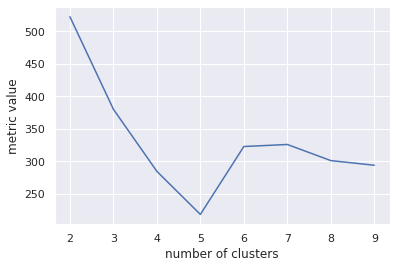

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/2.txt

INPUT DATA


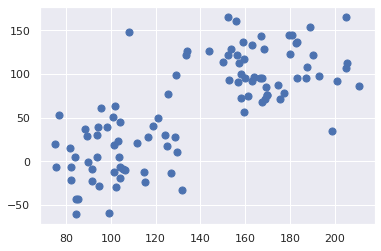


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.60045438, 0.66845765],
       [0.77858914, 0.90811842]])


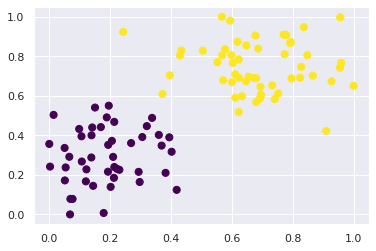

label: 1 - dot: [0.83643146 0.94785831]
label: 1 - dot: [1.         0.65050867]
label: 0 - dot: [0.01409212 0.50356007]
label: 1 - dot: [0.79369278 0.87159939]
label: 0 - dot: [0.05035823 0.3363216 ]
label: 1 - dot: [0.50452388 0.8284419 ]
...

ITERATION 2
init centers: 
array([[0.19276577, 0.21606181],
       [0.56686357, 1.        ]])


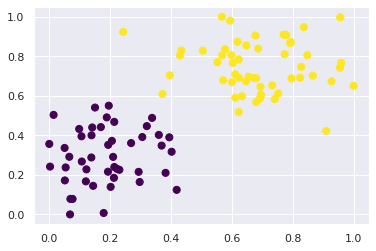

label: 1 - dot: [0.83643146 0.94785831]
label: 1 - dot: [1.         0.65050867]
label: 0 - dot: [0.01409212 0.50356007]
label: 1 - dot: [0.79369278 0.87159939]
label: 0 - dot: [0.05035823 0.3363216 ]
label: 1 - dot: [0.50452388 0.8284419 ]
...

ITERATION 3
init centers: 
array([[0.69382735, 0.64561385],
       [1.        , 0.65050867]])


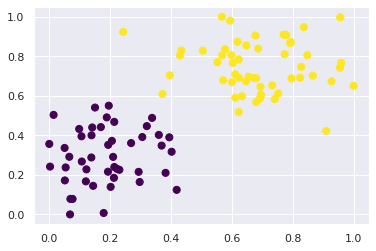

label: 1 - dot: [0.83643146 0.94785831]
label: 1 - dot: [1.         0.65050867]
label: 0 - dot: [0.01409212 0.50356007]
label: 1 - dot: [0.79369278 0.87159939]
label: 0 - dot: [0.05035823 0.3363216 ]
label: 1 - dot: [0.50452388 0.8284419 ]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 3.6292226471165763
cluster 1 wcsm: 3.6292226471165763
cluster 2 wcsm: 3.6292226471165763

best cluster index: 0
best cluster wcsm: 3.6292226471165763

CALINSKI HARABASZ INDEX
my metric: 297.99672586881246 - sklearn metric: 297.99672586881246
my metric: 202.1972755110913 - sklearn metric: 202.1972755110913
my metric: 183.16378867413263 - sklearn metric: 183.16378867413263
my metric: 141.81533160542662 - sklearn metric: 141.81533160542662
my metric: 178.1987201263434 - sklearn metric: 178.1987201263434
my metric: 176.38418642976205 - sklearn metric: 176.38418642976205
my metric: 160.69696993998463 - sklearn metric: 160.69696993998463
my metric: 169.59623517976073 - sklearn metric: 169.59623517976073


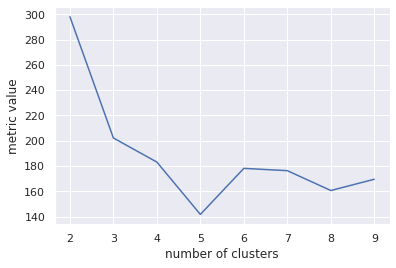

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/3.txt

INPUT DATA


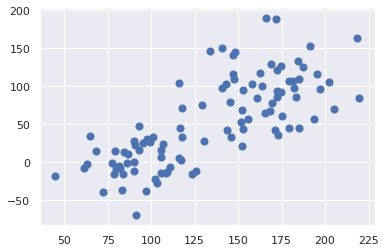


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.23932729, 0.31027755],
       [0.19402812, 0.2093828 ]])


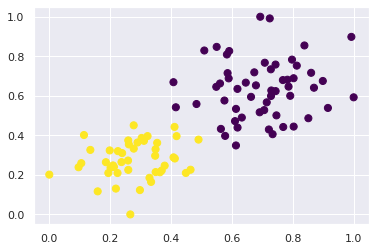

label: 0 - dot: [1.         0.59239044]
label: 1 - dot: [0.21879942 0.13061668]
label: 1 - dot: [0.26136623 0.35423435]
label: 0 - dot: [0.40794689 0.66894922]
label: 1 - dot: [0.25945569 0.37436019]
label: 1 - dot: [0.41142621 0.44275735]
...

ITERATION 2
init centers: 
array([[0.86025854, 0.71641312],
       [0.79747932, 0.78311179]])


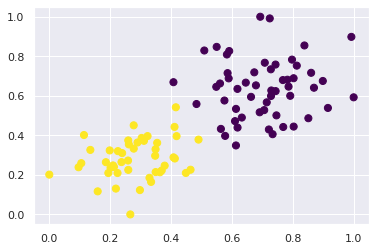

label: 0 - dot: [1.         0.59239044]
label: 1 - dot: [0.21879942 0.13061668]
label: 1 - dot: [0.26136623 0.35423435]
label: 0 - dot: [0.40794689 0.66894922]
label: 1 - dot: [0.25945569 0.37436019]
label: 1 - dot: [0.41142621 0.44275735]
...

ITERATION 3
init centers: 
array([[0.86959521, 0.64089162],
       [0.32913697, 0.18519188]])


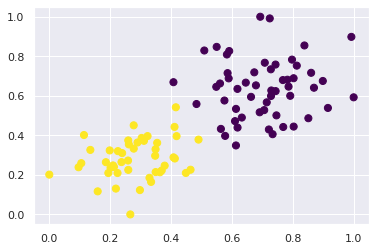

label: 0 - dot: [1.         0.59239044]
label: 1 - dot: [0.21879942 0.13061668]
label: 1 - dot: [0.26136623 0.35423435]
label: 0 - dot: [0.40794689 0.66894922]
label: 1 - dot: [0.25945569 0.37436019]
label: 1 - dot: [0.41142621 0.44275735]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 2.9710068108404686
cluster 1 wcsm: 2.968926684308723
cluster 2 wcsm: 2.968926684308723

best cluster index: 1
best cluster wcsm: 2.968926684308723

CALINSKI HARABASZ INDEX
my metric: 248.23087143203972 - sklearn metric: 248.23087143203972
my metric: 187.50690777647264 - sklearn metric: 187.50690777647264
my metric: 160.65736917572835 - sklearn metric: 160.65736917572835
my metric: 154.70798853733635 - sklearn metric: 154.70798853733635
my metric: 133.77532432562703 - sklearn metric: 133.77532432562703
my metric: 138.3244931011584 - sklearn metric: 138.3244931011584
my metric: 139.78240453364907 - sklearn metric: 139.78240453364907
my metric: 123.98443517270134 - sklearn metric: 123.98443517270134


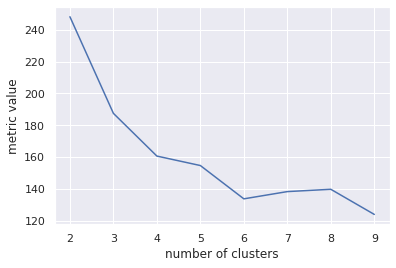

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/4.txt

INPUT DATA


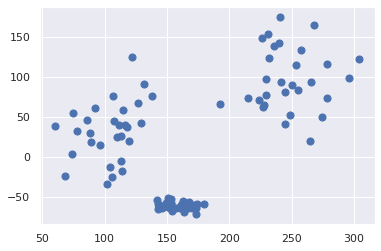


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.11869634, 0.3680391 ],
       [0.18006569, 0.2424012 ]])


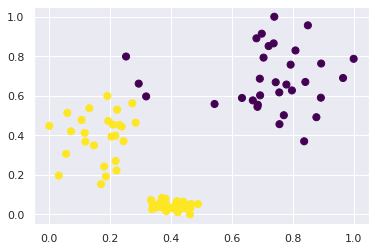

label: 1 - dot: [0.03115148 0.19669086]
label: 0 - dot: [0.79720498 0.62726766]
label: 0 - dot: [0.7039262  0.79320318]
label: 1 - dot: [0.27287603 0.56197503]
label: 1 - dot: [0.        0.4481192]
label: 1 - dot: [0.42206335 0.01082262]
...

ITERATION 2
init centers: 
array([[0.21702685, 0.39854395],
       [0.41903076, 0.03237358]])


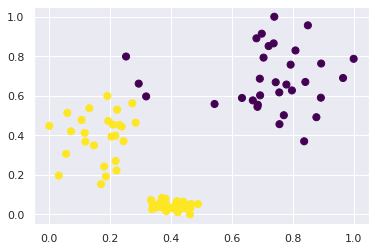

label: 1 - dot: [0.03115148 0.19669086]
label: 0 - dot: [0.79720498 0.62726766]
label: 0 - dot: [0.7039262  0.79320318]
label: 1 - dot: [0.27287603 0.56197503]
label: 1 - dot: [0.        0.4481192]
label: 1 - dot: [0.42206335 0.01082262]
...

ITERATION 3
init centers: 
array([[0.11618623, 0.41231735],
       [0.44048088, 0.06398194]])


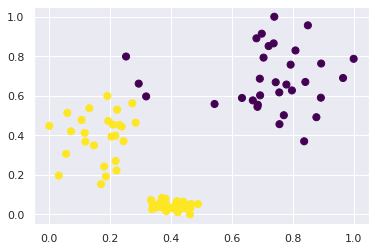

label: 1 - dot: [0.03115148 0.19669086]
label: 0 - dot: [0.79720498 0.62726766]
label: 0 - dot: [0.7039262  0.79320318]
label: 1 - dot: [0.27287603 0.56197503]
label: 1 - dot: [0.        0.4481192]
label: 1 - dot: [0.42206335 0.01082262]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 5.090512239883353
cluster 1 wcsm: 5.090512239883353
cluster 2 wcsm: 5.090512239883353

best cluster index: 0
best cluster wcsm: 5.090512239883353

CALINSKI HARABASZ INDEX
my metric: 178.68782552888018 - sklearn metric: 178.68782552888018
my metric: 324.1132175293318 - sklearn metric: 324.1132175293318
my metric: 274.9857917934299 - sklearn metric: 274.9857917934299
my metric: 331.58387439474046 - sklearn metric: 331.58387439474046
my metric: 299.01887186049703 - sklearn metric: 299.01887186049703
my metric: 246.82204117591823 - sklearn metric: 246.82204117591823
my metric: 313.0943814900906 - sklearn metric: 313.0943814900906
my metric: 306.62324397967546 - sklearn metric: 306.62324397967546


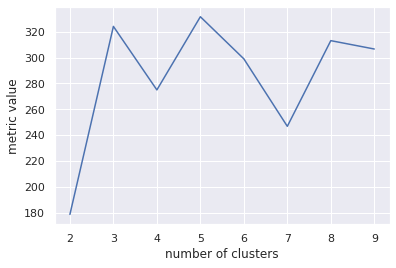

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/5.txt

INPUT DATA


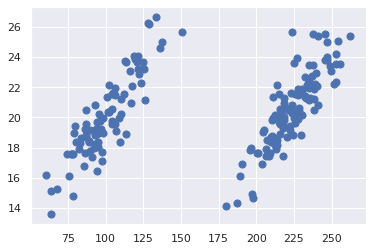


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.75981953, 0.65398457],
       [0.91777225, 0.91265363]])


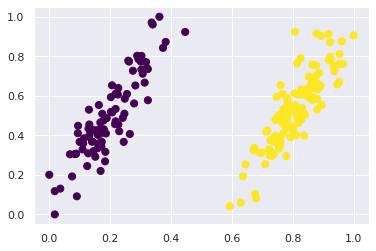

label: 1 - dot: [0.63655292 0.19255696]
label: 1 - dot: [0.83766868 0.39931074]
label: 0 - dot: [0.32020679 0.74087346]
label: 1 - dot: [0.91777225 0.91265363]
label: 1 - dot: [0.87657791 0.75411723]
label: 0 - dot: [0.12453468 0.2445561 ]
...

ITERATION 2
init centers: 
array([[0.75396935, 0.34965232],
       [0.78280381, 0.49245936]])


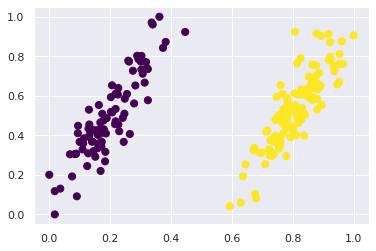

label: 1 - dot: [0.63655292 0.19255696]
label: 1 - dot: [0.83766868 0.39931074]
label: 0 - dot: [0.32020679 0.74087346]
label: 1 - dot: [0.91777225 0.91265363]
label: 1 - dot: [0.87657791 0.75411723]
label: 0 - dot: [0.12453468 0.2445561 ]
...

ITERATION 3
init centers: 
array([[0.86409771, 0.66229528],
       [0.77776666, 0.44772637]])


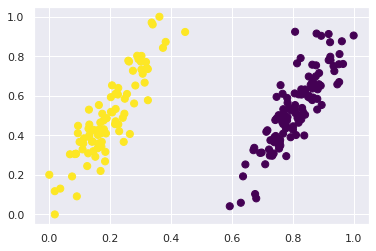

label: 0 - dot: [0.63655292 0.19255696]
label: 0 - dot: [0.83766868 0.39931074]
label: 1 - dot: [0.32020679 0.74087346]
label: 0 - dot: [0.91777225 0.91265363]
label: 0 - dot: [0.87657791 0.75411723]
label: 1 - dot: [0.12453468 0.2445561 ]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 9.343606019942113
cluster 1 wcsm: 9.343606019942113
cluster 2 wcsm: 9.343606019942113

best cluster index: 0
best cluster wcsm: 9.343606019942113

CALINSKI HARABASZ INDEX
my metric: 392.01189640521375 - sklearn metric: 392.01189640521375
my metric: 336.92386098409844 - sklearn metric: 336.92386098409844
my metric: 489.4779820571137 - sklearn metric: 489.4779820571137
my metric: 486.6697336282723 - sklearn metric: 486.6697336282723
my metric: 503.45510640408986 - sklearn metric: 503.45510640408986
my metric: 542.8677229768114 - sklearn metric: 542.8677229768114
my metric: 531.5010914965052 - sklearn metric: 531.5010914965052
my metric: 643.09458120761 - sklearn metric: 643.09458120761


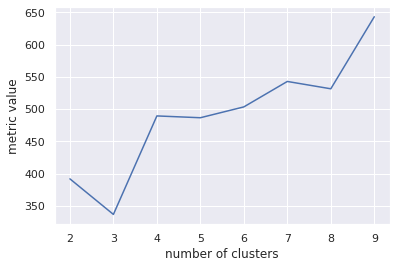

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/6.txt

INPUT DATA


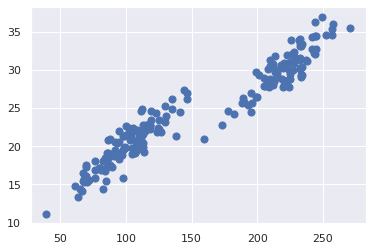


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.3122804 , 0.38496614],
       [0.25422445, 0.39669578]])


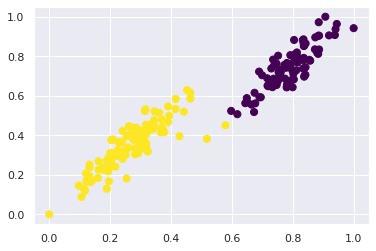

label: 1 - dot: [0.39398444 0.49900387]
label: 1 - dot: [0.26307959 0.4019467 ]
label: 0 - dot: [0.93831215 0.90746017]
label: 0 - dot: [0.78081814 0.76626821]
label: 1 - dot: [0.17675078 0.23585918]
label: 0 - dot: [0.73539249 0.78343797]
...

ITERATION 2
init centers: 
array([[0.30519783, 0.38747577],
       [0.27609348, 0.40496212]])


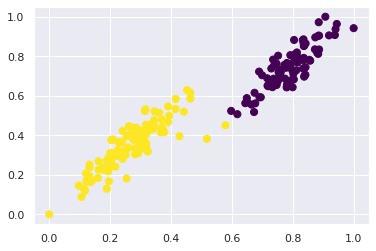

label: 1 - dot: [0.39398444 0.49900387]
label: 1 - dot: [0.26307959 0.4019467 ]
label: 0 - dot: [0.93831215 0.90746017]
label: 0 - dot: [0.78081814 0.76626821]
label: 1 - dot: [0.17675078 0.23585918]
label: 0 - dot: [0.73539249 0.78343797]
...

ITERATION 3
init centers: 
array([[0.39398444, 0.49900387],
       [0.75099319, 0.67474769]])


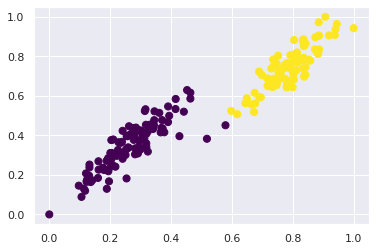

label: 0 - dot: [0.39398444 0.49900387]
label: 0 - dot: [0.26307959 0.4019467 ]
label: 1 - dot: [0.93831215 0.90746017]
label: 1 - dot: [0.78081814 0.76626821]
label: 0 - dot: [0.17675078 0.23585918]
label: 1 - dot: [0.73539249 0.78343797]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 4.2432627675085595
cluster 1 wcsm: 4.2432627675085595
cluster 2 wcsm: 4.2432627675085595

best cluster index: 0
best cluster wcsm: 4.2432627675085595

CALINSKI HARABASZ INDEX
my metric: 985.0007813375626 - sklearn metric: 985.0007813375626
my metric: 862.9412500494415 - sklearn metric: 862.9412500494415
my metric: 905.6010319184354 - sklearn metric: 905.6010319184354
my metric: 942.6804103399186 - sklearn metric: 942.6804103399186
my metric: 996.9390263062797 - sklearn metric: 996.9390263062797
my metric: 1005.6619278270025 - sklearn metric: 1005.6619278270025
my metric: 921.3766999494361 - sklearn metric: 921.3766999494361
my metric: 901.216492427267 - sklearn metric: 901.216492427267


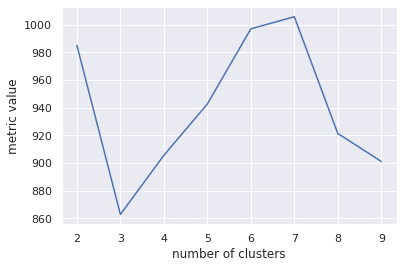

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/7.txt

INPUT DATA


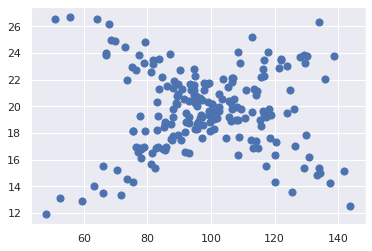


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.0287581 , 0.98732549],
       [0.51023103, 0.50166681]])


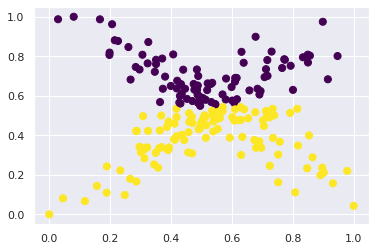

label: 0 - dot: [0.44600669 0.63587385]
label: 1 - dot: [0.97884696 0.22016742]
label: 1 - dot: [0.56936023 0.52263835]
label: 1 - dot: [0.50005436 0.46754261]
label: 1 - dot: [0.73396299 0.53438348]
label: 1 - dot: [0.30096697 0.31470095]
...

ITERATION 2
init centers: 
array([[0.8985898 , 0.97466445],
       [0.49073699, 0.43076498]])


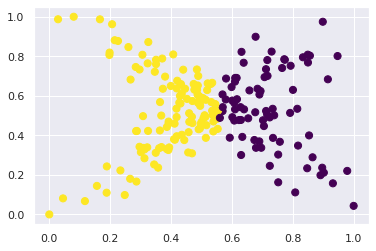

label: 1 - dot: [0.44600669 0.63587385]
label: 0 - dot: [0.97884696 0.22016742]
label: 0 - dot: [0.56936023 0.52263835]
label: 1 - dot: [0.50005436 0.46754261]
label: 0 - dot: [0.73396299 0.53438348]
label: 1 - dot: [0.30096697 0.31470095]
...

ITERATION 3
init centers: 
array([[0.49518921, 0.56749749],
       [0.52038574, 0.66296713]])


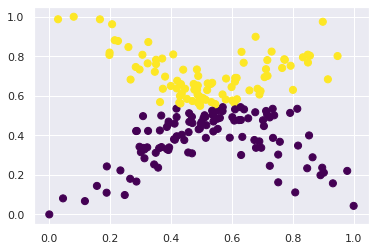

label: 1 - dot: [0.44600669 0.63587385]
label: 0 - dot: [0.97884696 0.22016742]
label: 0 - dot: [0.56936023 0.52263835]
label: 0 - dot: [0.50005436 0.46754261]
label: 0 - dot: [0.73396299 0.53438348]
label: 0 - dot: [0.30096697 0.31470095]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 11.028753062400149
cluster 1 wcsm: 11.007958971060003
cluster 2 wcsm: 11.028753062400149

best cluster index: 1
best cluster wcsm: 11.007958971060003

CALINSKI HARABASZ INDEX
my metric: 94.07833667700271 - sklearn metric: 94.07833667700271
my metric: 111.18923443383251 - sklearn metric: 111.18923443383251
my metric: 120.91446829210645 - sklearn metric: 120.91446829210645
my metric: 174.17217482995798 - sklearn metric: 174.17217482995798
my metric: 181.84625833116215 - sklearn metric: 181.84625833116215
my metric: 203.69262900562617 - sklearn metric: 203.69262900562617
my metric: 198.71697324855043 - sklearn metric: 198.71697324855043
my metric: 208.1828221307545 - sklearn metric: 208.1828221307545


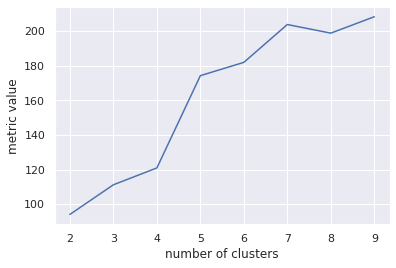

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/8.txt

INPUT DATA


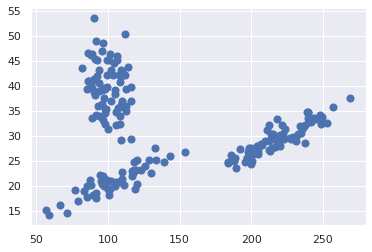


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.75147014, 0.34558093],
       [0.19904073, 0.53629143]])


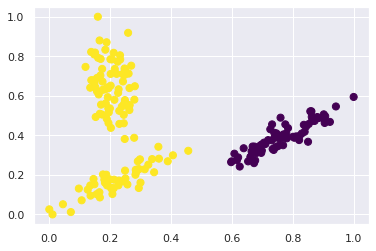

label: 0 - dot: [0.88599473 0.48795258]
label: 1 - dot: [0.14311173 0.67786659]
label: 1 - dot: [0.38925072 0.26883602]
label: 1 - dot: [0.21509449 0.73577105]
label: 1 - dot: [0.10626676 0.07142225]
label: 0 - dot: [0.7714768 0.3882861]
...

ITERATION 2
init centers: 
array([[0.2497889 , 0.72783637],
       [0.75975241, 0.48942675]])


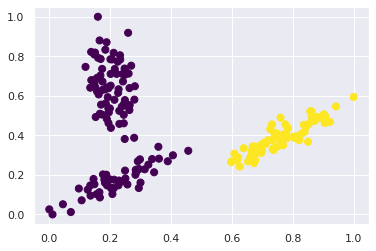

label: 1 - dot: [0.88599473 0.48795258]
label: 0 - dot: [0.14311173 0.67786659]
label: 0 - dot: [0.38925072 0.26883602]
label: 0 - dot: [0.21509449 0.73577105]
label: 0 - dot: [0.10626676 0.07142225]
label: 1 - dot: [0.7714768 0.3882861]
...

ITERATION 3
init centers: 
array([[0.61665954, 0.27465934],
       [0.59741764, 0.26439836]])


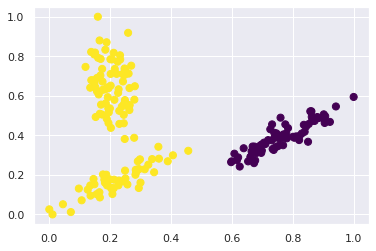

label: 0 - dot: [0.88599473 0.48795258]
label: 1 - dot: [0.14311173 0.67786659]
label: 1 - dot: [0.38925072 0.26883602]
label: 1 - dot: [0.21509449 0.73577105]
label: 1 - dot: [0.10626676 0.07142225]
label: 0 - dot: [0.7714768 0.3882861]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 10.086775158410232
cluster 1 wcsm: 10.086775158410232
cluster 2 wcsm: 10.086775158410232

best cluster index: 0
best cluster wcsm: 10.086775158410232

CALINSKI HARABASZ INDEX
my metric: 286.09132647810605 - sklearn metric: 286.09132647810605
my metric: 677.3715106073236 - sklearn metric: 677.3715106073236
my metric: 608.5162945368934 - sklearn metric: 608.5162945368934
my metric: 508.78912904294157 - sklearn metric: 508.78912904294157
my metric: 623.78408790828 - sklearn metric: 623.78408790828
my metric: 533.7423517420107 - sklearn metric: 533.7423517420107
my metric: 731.8915977961068 - sklearn metric: 731.8915977961068
my metric: 857.7350947414934 - sklearn metric: 857.7350947414934


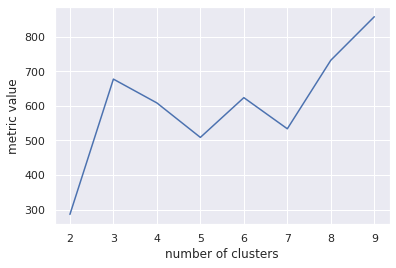

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/9.txt

INPUT DATA


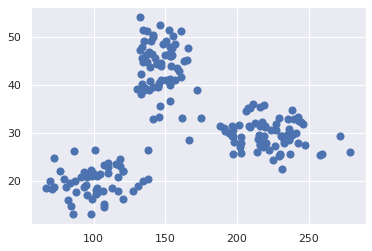


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.63704703, 0.34125026],
       [0.01989359, 0.12852355]])


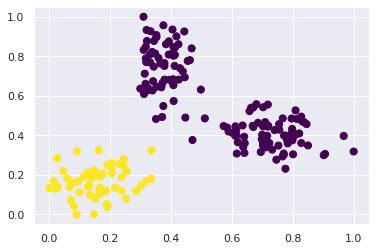

label: 0 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 0 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 1 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

ITERATION 2
init centers: 
array([[0.60139909, 0.41261929],
       [0.37495525, 0.95672461]])


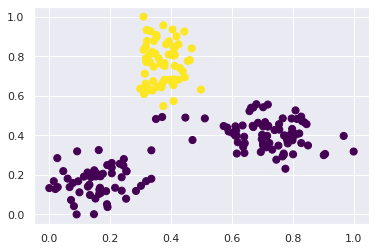

label: 1 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 1 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 0 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

ITERATION 3
init centers: 
array([[0.81350113, 0.48307212],
       [0.40479658, 0.93537004]])


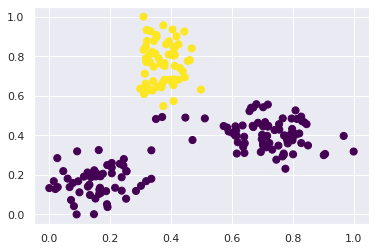

label: 1 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 1 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 0 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 11.545655690221961
cluster 1 wcsm: 15.258619100421566
cluster 2 wcsm: 15.258619100421566

best cluster index: 0
best cluster wcsm: 11.545655690221961

CALINSKI HARABASZ INDEX
my metric: 229.43184371921598 - sklearn metric: 229.43184371921598
my metric: 769.3620671426439 - sklearn metric: 769.3620671426439
my metric: 683.4684462440864 - sklearn metric: 683.4684462440864
my metric: 656.2835688655431 - sklearn metric: 656.2835688655431
my metric: 458.19707343255106 - sklearn metric: 458.19707343255106
my metric: 572.5067613937075 - sklearn metric: 572.5067613937075
my metric: 533.2890618052242 - sklearn metric: 533.2890618052242
my metric: 552.8422851441246 - sklearn metric: 552.8422851441246


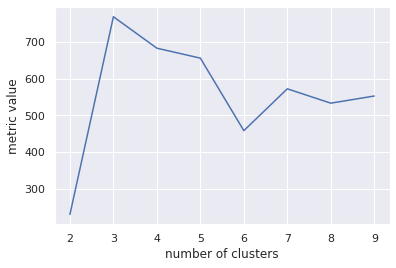

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/10.txt

INPUT DATA


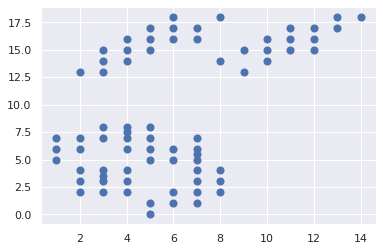


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.61538462, 0.72222222],
       [0.46153846, 0.05555556]])


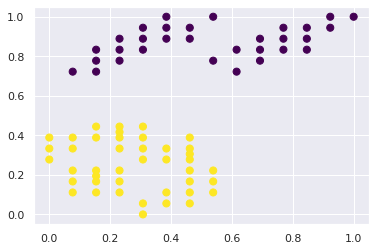

label: 1 - dot: [0.         0.27777778]
label: 1 - dot: [0.         0.33333333]
label: 1 - dot: [0.         0.38888889]
label: 1 - dot: [0.07692308 0.11111111]
label: 1 - dot: [0.07692308 0.16666667]
label: 1 - dot: [0.07692308 0.22222222]
...

ITERATION 2
init centers: 
array([[0.23076923, 0.83333333],
       [0.46153846, 0.22222222]])


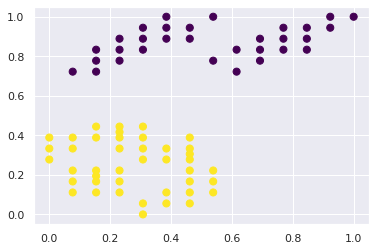

label: 1 - dot: [0.         0.27777778]
label: 1 - dot: [0.         0.33333333]
label: 1 - dot: [0.         0.38888889]
label: 1 - dot: [0.07692308 0.11111111]
label: 1 - dot: [0.07692308 0.16666667]
label: 1 - dot: [0.07692308 0.22222222]
...

ITERATION 3
init centers: 
array([[0.53846154, 0.16666667],
       [0.30769231, 0.        ]])


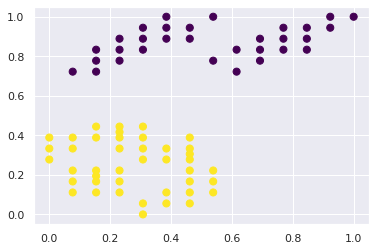

label: 1 - dot: [0.         0.27777778]
label: 1 - dot: [0.         0.33333333]
label: 1 - dot: [0.         0.38888889]
label: 1 - dot: [0.07692308 0.11111111]
label: 1 - dot: [0.07692308 0.16666667]
label: 1 - dot: [0.07692308 0.22222222]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 4.130321131260268
cluster 1 wcsm: 4.130321131260268
cluster 2 wcsm: 4.130321131260268

best cluster index: 0
best cluster wcsm: 4.130321131260268

CALINSKI HARABASZ INDEX
my metric: 137.5598022592291 - sklearn metric: 137.5598022592291
my metric: 142.22817410272705 - sklearn metric: 142.22817410272705
my metric: 157.51184416476667 - sklearn metric: 157.51184416476667
my metric: 144.74612196378152 - sklearn metric: 144.74612196378152
my metric: 135.8019294961716 - sklearn metric: 135.8019294961716
my metric: 129.5661308176635 - sklearn metric: 129.5661308176635
my metric: 138.28055299237735 - sklearn metric: 138.28055299237735
my metric: 174.37391441711165 - sklearn metric: 174.37391441711165


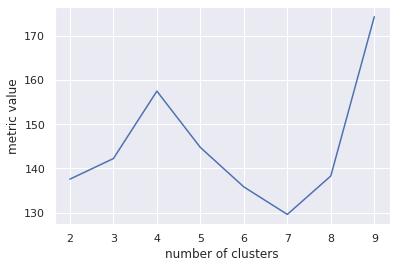

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/11.txt

INPUT DATA


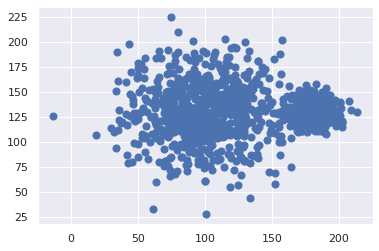


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.65876945, 0.63564436],
       [0.60642147, 0.52009859]])


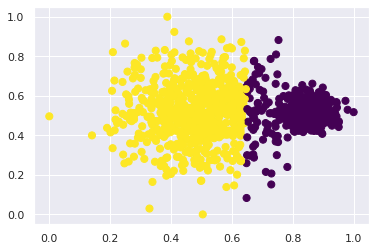

label: 0 - dot: [0.80338415 0.42158177]
label: 1 - dot: [0.387661   0.55662221]
label: 1 - dot: [0.51422561 0.68352348]
label: 1 - dot: [0.4253844  0.51068785]
label: 1 - dot: [0.59870998 0.60556956]
label: 1 - dot: [0.48380306 0.55989518]
...

ITERATION 2
init centers: 
array([[0.40678062, 0.66380018],
       [0.87945679, 0.50095797]])


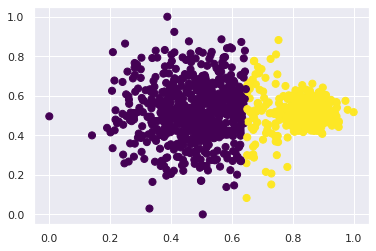

label: 1 - dot: [0.80338415 0.42158177]
label: 0 - dot: [0.387661   0.55662221]
label: 0 - dot: [0.51422561 0.68352348]
label: 0 - dot: [0.4253844  0.51068785]
label: 0 - dot: [0.59870998 0.60556956]
label: 0 - dot: [0.48380306 0.55989518]
...

ITERATION 3
init centers: 
array([[0.6299789 , 0.60025674],
       [0.38656068, 0.41473691]])


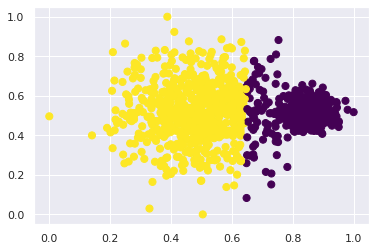

label: 0 - dot: [0.80338415 0.42158177]
label: 1 - dot: [0.387661   0.55662221]
label: 1 - dot: [0.51422561 0.68352348]
label: 1 - dot: [0.4253844  0.51068785]
label: 1 - dot: [0.59870998 0.60556956]
label: 1 - dot: [0.48380306 0.55989518]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 26.067247945494987
cluster 1 wcsm: 26.067247945494987
cluster 2 wcsm: 26.067247945494987

best cluster index: 0
best cluster wcsm: 26.067247945494987

CALINSKI HARABASZ INDEX
my metric: 1115.6924983263332 - sklearn metric: 1115.6924983263332
my metric: 1116.5836188615397 - sklearn metric: 1116.5836188615397
my metric: 1088.7670088291793 - sklearn metric: 1088.7670088291793
my metric: 1088.816038113768 - sklearn metric: 1088.816038113768
my metric: 1039.212272565539 - sklearn metric: 1039.212272565539
my metric: 979.1812754972277 - sklearn metric: 979.1812754972277
my metric: 909.9728527371971 - sklearn metric: 909.9728527371971
my metric: 950.4711298444099 - sklearn metric: 950.4711298444099


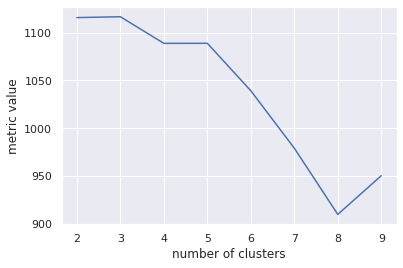

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/12.txt

INPUT DATA


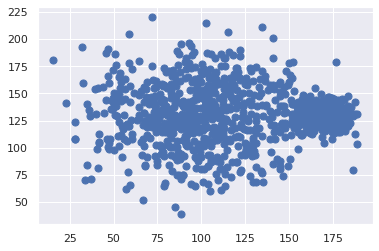


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.40931642, 0.4573846 ],
       [0.94268838, 0.47323309]])


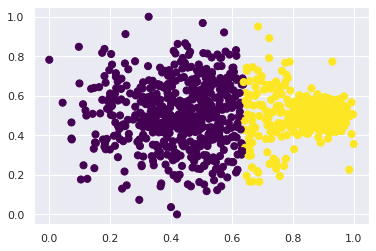

label: 0 - dot: [0.63225317 0.65750137]
label: 1 - dot: [0.98690374 0.50772424]
label: 0 - dot: [0.55933847 0.55825867]
label: 0 - dot: [0.61862188 0.30273362]
label: 0 - dot: [0.50598369 0.81605767]
label: 0 - dot: [0.53333622 0.54800451]
...

ITERATION 2
init centers: 
array([[0.17654205, 0.37914574],
       [0.14808601, 0.23375847]])


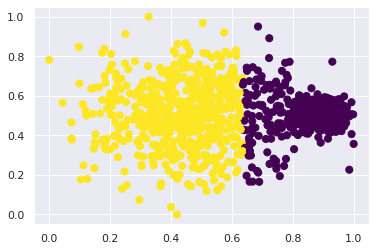

label: 1 - dot: [0.63225317 0.65750137]
label: 0 - dot: [0.98690374 0.50772424]
label: 1 - dot: [0.55933847 0.55825867]
label: 1 - dot: [0.61862188 0.30273362]
label: 1 - dot: [0.50598369 0.81605767]
label: 1 - dot: [0.53333622 0.54800451]
...

ITERATION 3
init centers: 
array([[0.30074807, 0.51112528],
       [0.74516638, 0.24712944]])


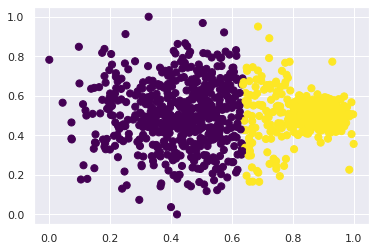

label: 0 - dot: [0.63225317 0.65750137]
label: 1 - dot: [0.98690374 0.50772424]
label: 0 - dot: [0.55933847 0.55825867]
label: 0 - dot: [0.61862188 0.30273362]
label: 0 - dot: [0.50598369 0.81605767]
label: 0 - dot: [0.53333622 0.54800451]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 32.89072282240005
cluster 1 wcsm: 32.890633904209835
cluster 2 wcsm: 32.890633904209835

best cluster index: 1
best cluster wcsm: 32.890633904209835

CALINSKI HARABASZ INDEX
my metric: 1299.0440371075447 - sklearn metric: 1299.0440371075447
my metric: 1175.607289939884 - sklearn metric: 1175.607289939884
my metric: 1214.3464369217286 - sklearn metric: 1214.3464369217286
my metric: 1134.0674923932438 - sklearn metric: 1134.0674923932438
my metric: 1125.2811243609733 - sklearn metric: 1125.2811243609733
my metric: 1088.7969029799508 - sklearn metric: 1088.7969029799508
my metric: 1073.0172733443078 - sklearn metric: 1073.0172733443078
my metric: 1036.1840967491614 - sklearn metric: 1036.1840967491614


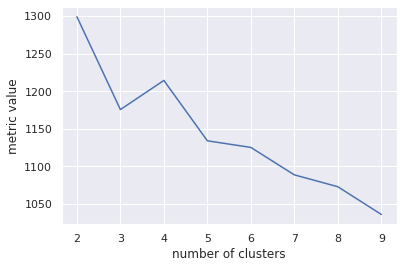

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/13.txt

INPUT DATA


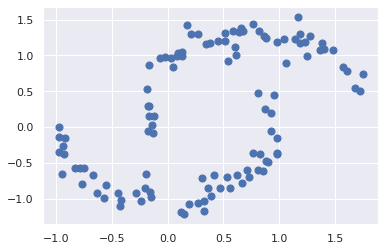


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.93613041, 0.74654561],
       [0.29152642, 0.63551435]])


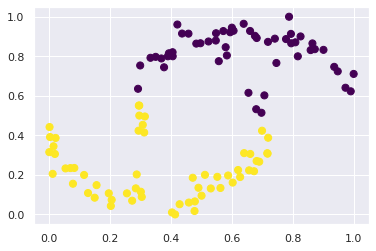

label: 0 - dot: [0.99039942 0.62275478]
label: 1 - dot: [0.12729161 0.10816473]
label: 1 - dot: [0.28428011 0.13188035]
label: 0 - dot: [0.7777544  0.88707361]
label: 1 - dot: [0.30714695 0.45323322]
label: 1 - dot: [0.02074531 0.38689764]
...

ITERATION 2
init centers: 
array([[0.7939344 , 0.91320019],
       [0.28725652, 0.20222733]])


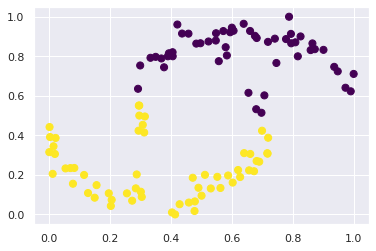

label: 0 - dot: [0.99039942 0.62275478]
label: 1 - dot: [0.12729161 0.10816473]
label: 1 - dot: [0.28428011 0.13188035]
label: 0 - dot: [0.7777544  0.88707361]
label: 1 - dot: [0.30714695 0.45323322]
label: 1 - dot: [0.02074531 0.38689764]
...

ITERATION 3
init centers: 
array([[0.71845012, 0.87296425],
       [0.25503079, 0.10668536]])


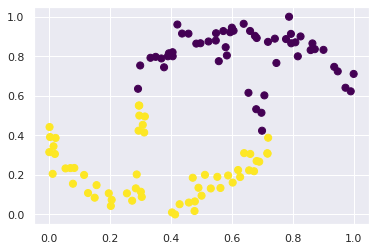

label: 0 - dot: [0.99039942 0.62275478]
label: 1 - dot: [0.12729161 0.10816473]
label: 1 - dot: [0.28428011 0.13188035]
label: 0 - dot: [0.7777544  0.88707361]
label: 1 - dot: [0.30714695 0.45323322]
label: 1 - dot: [0.02074531 0.38689764]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 6.896473037778838
cluster 1 wcsm: 6.896473037778838
cluster 2 wcsm: 6.8979788920421985

best cluster index: 0
best cluster wcsm: 6.896473037778838

CALINSKI HARABASZ INDEX
my metric: 183.68602044910696 - sklearn metric: 183.68602044910696
my metric: 170.84778846169016 - sklearn metric: 170.84778846169016
my metric: 186.67621802719847 - sklearn metric: 186.67621802719847
my metric: 187.48723447932917 - sklearn metric: 187.48723447932917
my metric: 193.87670213291233 - sklearn metric: 193.87670213291233
my metric: 213.56467295684902 - sklearn metric: 213.56467295684902
my metric: 194.88009265951703 - sklearn metric: 194.88009265951703
my metric: 236.44563135468485 - sklearn metric: 236.44563135468485


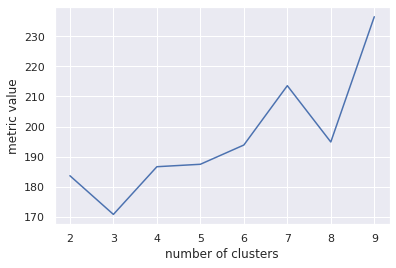

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/14.txt

INPUT DATA


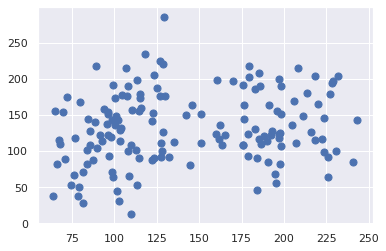


DATA AFTER CLUSTERIZATION

ITERATION 1
init centers: 
array([[0.62435613, 0.35225019],
       [0.74358773, 0.38433421]])


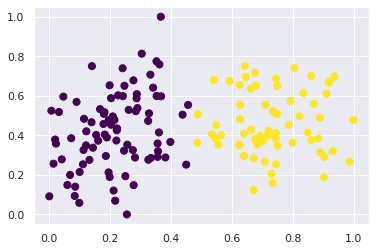

label: 0 - dot: [0.2202818  0.37388822]
label: 1 - dot: [0.6268227  0.48070005]
label: 0 - dot: [0.07192329 0.38525444]
label: 0 - dot: [0.09860703 0.05857054]
label: 0 - dot: [0.12161237 0.42028502]
label: 1 - dot: [0.91704373 0.66544164]
...

ITERATION 2
init centers: 
array([[0.33212596, 0.70693579],
       [0.19511467, 0.47684862]])


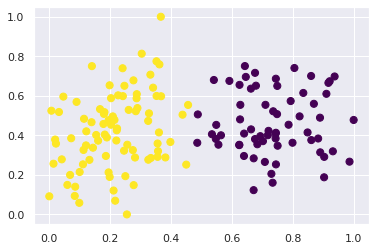

label: 1 - dot: [0.2202818  0.37388822]
label: 0 - dot: [0.6268227  0.48070005]
label: 1 - dot: [0.07192329 0.38525444]
label: 1 - dot: [0.09860703 0.05857054]
label: 1 - dot: [0.12161237 0.42028502]
label: 0 - dot: [0.91704373 0.66544164]
...

ITERATION 3
init centers: 
array([[0.91044522, 0.6101005 ],
       [0.62506595, 0.6553579 ]])


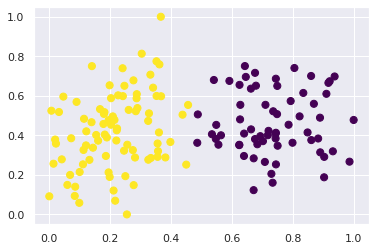

label: 1 - dot: [0.2202818  0.37388822]
label: 0 - dot: [0.6268227  0.48070005]
label: 1 - dot: [0.07192329 0.38525444]
label: 1 - dot: [0.09860703 0.05857054]
label: 1 - dot: [0.12161237 0.42028502]
label: 0 - dot: [0.91704373 0.66544164]
...

COMPARING CLUSTERS:
cluster 0 wcsm: 6.862659789154501
cluster 1 wcsm: 6.862659789154501
cluster 2 wcsm: 6.862659789154501

best cluster index: 0
best cluster wcsm: 6.862659789154501

CALINSKI HARABASZ INDEX
my metric: 214.1944021683794 - sklearn metric: 214.1944021683794
my metric: 188.10743221571005 - sklearn metric: 188.10743221571005
my metric: 184.83238019991128 - sklearn metric: 184.83238019991128
my metric: 172.2472370893427 - sklearn metric: 172.2472370893427
my metric: 172.87804576983993 - sklearn metric: 172.87804576983993
my metric: 162.72968226669167 - sklearn metric: 162.72968226669167
my metric: 173.2909024183749 - sklearn metric: 173.2909024183749
my metric: 166.5653181684572 - sklearn metric: 166.5653181684572


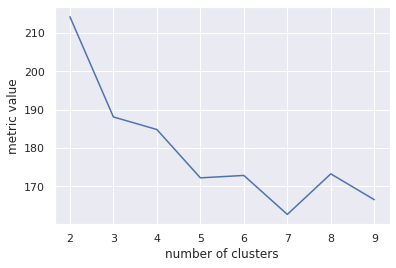

In [33]:
from copy import deepcopy

import pandas as pd
import seaborn as sns
sns.set()
import numpy as np

import pprint

def calinski_harabasz_index(X, labels):
    n_samples, _ = X.shape
    n_labels = len(set(labels))

    bcsm, wcsm = 0., 0.
    mean = np.mean(X, axis=0)

    for k in range(n_labels):
        cluster_k = X[labels == k]
        mean_k = np.mean(cluster_k, axis=0)
        bcsm += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        wcsm += np.sum((cluster_k - mean_k) ** 2)

    if wcsm == 0.:
        return 1.
    else:
        return bcsm * (n_samples - n_labels) / (wcsm * (n_labels - 1.))

def normalize(df):
    df_norm = deepcopy(df)
    df_num_norm = (df - df.min()) / (df.max() - df.min())
    df_norm[df_num_norm.columns] = df_num_norm
    return np.array(df_norm)

from sklearn.metrics import pairwise_distances_argmin

def k_means(X, n_clusters, debug=False):
    # 1. Randomly choose clusters.
    rng = np.random.default_rng()
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    if debug:
      print('init centers: ')
      pp = pprint.PrettyPrinter(indent=4)
      pp.pprint(centers)

    while True:
        # 2a. Assign labels based on closest center.
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points.
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence.
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

def k_means_mod(X, n_clusters, n_iterations=3, debug=False):
    clusters_data = {}

    for i in range(n_iterations):

        if debug:
            print('\nITERATION ' + str(i+1))

        centers, labels = k_means(X, n_clusters, debug=debug)
        clusters_data[i] = (centers, labels)

        if debug:
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
            plt.show()

            for i, x in enumerate(X):
              print('label: ' + str(labels[i]) + ' - dot: ' + str(x))
              if i == 5:
                print("...")
                break

    if debug:
        print('\nCOMPARING CLUSTERS:')

    best_cluster_index = 0
    best_cluster_score = 0
    for cluster_index, cluster_data in clusters_data.items():
        labels = cluster_data[1]
        n_labels = len(set(labels))

        wcsm = 0.
        for k in range(n_labels):
            cluster_k = X[labels == k]
            mean_k = np.mean(cluster_k, axis=0)
            wcsm += np.sum((cluster_k - mean_k) ** 2)

        if debug:
            print('cluster ' + str(cluster_index) + ' wcsm: ' + str(wcsm))
        if wcsm < best_cluster_score or best_cluster_score == 0:
          best_cluster_index = cluster_index
          best_cluster_score = wcsm

    if debug:
        print('\nbest cluster index: ' + str(best_cluster_index))
        print('best cluster wcsm: ' + str(best_cluster_score))

    return clusters_data[best_cluster_index]


import matplotlib.pyplot as plt
from sklearn import metrics

for i in range(1, 15):
    data_file_path = '/content/drive/My Drive/Colab Notebooks/data-project5/' + str(i) + '.txt'
    df = pd.read_table(data_file_path, header = None, sep = '\s+')

    print('FILE PATH: ' + data_file_path + '\n')
    print('INPUT DATA')
    plt.scatter(df[0], df[1], s=50, cmap='viridis')
    plt.show()

    X = normalize(df)

    print('\nDATA AFTER CLUSTERIZATION')

    centers, labels = k_means_mod(X, 2, debug=True)

    print('\nCALINSKI HARABASZ INDEX')
    my_metrics = {}
    for n_clusters in range(2, 10):
      centers, labels = k_means_mod(X, n_clusters, debug=False)
      my_metrics[n_clusters] = calinski_harabasz_index(X, labels)

      print('my metric: ' + str(calinski_harabasz_index(X, labels)) +
            ' - sklearn metric: ' + str(metrics.calinski_harabasz_score(X, labels)))

    plt.plot(list(my_metrics.keys()), list(my_metrics.values()))
    plt.xlabel("number of clusters")
    plt.ylabel("metric value")
    plt.show()